A6
1. How many different species were found in the sample?
To answer this question, count the number of rows in the dataframe.
(Note: in column 3 with heading “taxonomy_lvl” all rows are level “S” for species.)


In [6]:
# File path for 'bracken'
file_path = "/Users/tomasmanea/Desktop/Fall2024/QBIO401/A6/corrafterrain.bracken"

# Load the file
lariv = pd.read_csv(file_path, sep="\t")

# Print a preview of dataframe
#print(lariv.head())

# Print output of different species
species_count = lariv.shape[0]
print(f"The number of different species is {species_count}")


The number of different species is 4539


2. How many reads were mapped to a species?

In [13]:
total_reads = lariv['new_est_reads'].sum()
print(f"The reads mapped to a species are {total_reads}")


The reads mapped to a species are 4884486


3. What fraction of these reads were added by Bracken?
To answer this question, take the ratio of the sum of the column with heading “added_reads” to the sum of the column with heading “new_est_reads”.

In [15]:
fraction_added_reads = lariv['added_reads'].sum() / lariv['new_est_reads'].sum()
print(f"Fraction of these reads were added by Bracken {fraction_added_reads:.3f}")


Fraction of these reads were added by Bracken 0.239


4. Make a scatter plot where each species gets one dot. The x-axis should be the number in the column “new_est_reads” for that species. The y-axis should be the ratio of the number in the column “added_reads” to the number in the column “new_est_reads” for that species. Label the axes. Comment on the plot.

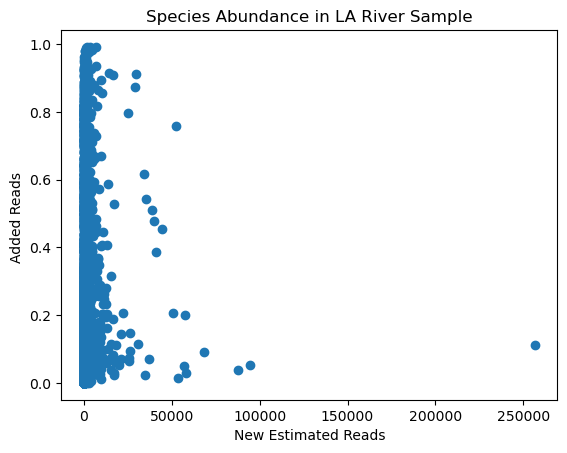

In [16]:
import matplotlib.pyplot as plt
lariv['read_ratio'] = lariv['added_reads'] / lariv['new_est_reads']
plt.scatter(lariv['new_est_reads'], lariv['read_ratio'])
plt.xlabel('New Estimated Reads')
plt.ylabel('Added Reads ')
plt.title('Species Abundance in LA River Sample')
plt.show()


5. List the species where the column “fraction_total_reads” is greater than 1%. How many of them are there? Which species has the highest fraction and what is this fraction?

In [21]:
# Filter species where fraction_total_reads is greater than 1%
high_frac_species = lariv[lariv['fraction_total_reads'] > 0.01]

# Print list of species names
print("List of the Species:")
print(high_frac_species['name'])
print(" ")

# Print results
species_count_above_threshold = high_frac_species.shape[0]
highest_fraction_species = high_frac_species.loc[high_frac_species['fraction_total_reads'].idxmax()]

print(f"There are {species_count_above_threshold} species, where {highest_fraction_species['name']} has the highest fraction at {highest_fraction_species['fraction_total_reads']:.2f}")


List of the Species:
159           Curvibacter sp. AEP1-3
904     Polynucleobacter acidiphobus
1069                    Homo sapiens
1134      Limnohabitans sp. 63ED37-2
1135       Limnohabitans sp. 103DPR2
1622    Polynucleobacter necessarius
2039        Hydrogenophaga sp. RAC07
2094      Cloacibacterium normanense
2107               Acidovorax sp. T1
3861         beta proteobacterium CB
Name: name, dtype: object
 
There are 10 species, where Limnohabitans sp. 63ED37-2 has the highest fraction at 0.05


6. Next we are going to randomly sub-sample reads from this dataset to see where we are
in the refraction curve (for an example of a rarefaction curve see slide 58 of the “Metagenomics” lecture slides). A rarefaction curve plots the number of reads on the x- axis and the number of species on the y-axis. As you can imagine, if we have a very small number of reads then additional reads will yield many new species, while if we have a very large number of reads then additional reads will yield few new species (instead these additional reads will usually belong to species we have already found).

I want you to write a function to estimate how many different species we would have found if we had sequenced only a fraction f of the reads we actually sequenced.

I want you to report the estimated number of different species for the following values of the fraction f: 0.0001, 0.001, 0.01, 0.1, 0.5, and 1.0 (1.0 means we sequenced all the reads we actually sampled). 

In addition, I want you to make a plot with the f values on the x-axis and the estimated number of different species on the y-axis.

What are the values of f where we would have found about the same number of different species we found with the full dataset? What are the values of f where we would have found many fewer species than we found with the full dataset?


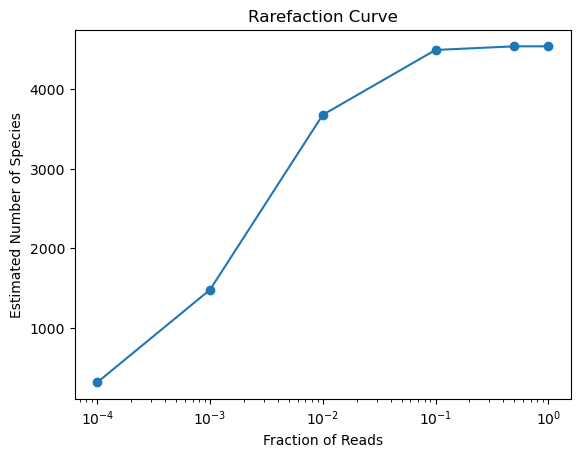

Fractions are [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0], respectively
The number of species per fraction is [312, 1477, 3677, 4493, 4539, 4539]


In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Function to estimate the number of species by randomly sampling reads
def estimate_species(fraction, df):
    
    # Calculate the total number of reads in the full dataset
    total_reads = df['new_est_reads'].sum()
    
    # Determine the number of reads to sample based on the fraction
    sampled_reads = int(total_reads * fraction)
    
    # Repeat each species according to their read counts
    species_pool = np.repeat(df['name'], df['new_est_reads'])
    
    # Randomly sample from this pool
    sampled_species = np.random.choice(species_pool, size=sampled_reads, replace=False)
    
    # Count the number of unique species in the sample
    unique_species = len(np.unique(sampled_species))
    
    return unique_species

# Define the fractions to evaluate
fractions = [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0]

# Estimate the number of species for each fraction
estimated_species = [estimate_species(f, lariv) for f in fractions]

# Plot the rarefaction curve
plt.plot(fractions, estimated_species, marker='o')
plt.xlabel('Fraction of Reads')
plt.ylabel('Estimated Number of Species')
plt.title('Rarefaction Curve')
plt.xscale('log')  # Logarithmic scale for the x-axis
plt.show()

# Print the estimated number of species for each fraction
print(f"Fractions are {fractions}, respectively")
print(f"The number of species per fraction is {estimated_species}")
